In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
dataset.filename

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv'

In [6]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
dataset.feature_names # column name 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# <U7
dt = np.dtype('<U7')
dt.name, dt.itemsize

('str224', 28)

In [ ]:
dataset.target  # house price

In [7]:
df = pd.DataFrame(dataset.data, 
                  columns=dataset.feature_names)

In [8]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [9]:
df["PRICE"] = dataset.target

In [10]:
df.sample(5)

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
316  0.31827   0.0   9.90   0.0  0.544  ...  304.0     18.4  390.70  18.33   17.8
265  0.76162  20.0   3.97   0.0  0.647  ...  264.0     13.0  392.40  10.45   22.8
100  0.14866   0.0   8.56   0.0  0.520  ...  384.0     20.9  394.76   9.42   27.5
232  0.57529   0.0   6.20   0.0  0.507  ...  307.0     17.4  385.91   2.47   41.7
318  0.40202   0.0   9.90   0.0  0.544  ...  304.0     18.4  395.21  10.36   23.1

[5 rows x 14 columns]

In [11]:
# 1. Processing (EDA)
# 2. Data Spliting 

In [12]:
df.shape # 13 input + 1 output

(506, 14)

In [13]:
df.describe()

CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]

In [ ]:
np.array([3,4,5]).mean(), np.array([3,4,5,99]).mean()

(4.0, 27.75)

In [ ]:
df.loc[df.CRIM > 10].head()

CRIM   ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
367  13.5222  0.0   18.1   0.0  0.631  ...  666.0     20.2  131.42  13.33   23.1
373  11.1081  0.0   18.1   0.0  0.668  ...  666.0     20.2  396.90  34.77   13.8
374  18.4982  0.0   18.1   0.0  0.668  ...  666.0     20.2  396.90  37.97   13.8
375  19.6091  0.0   18.1   0.0  0.671  ...  666.0     20.2  396.90  13.44   15.0
376  15.2880  0.0   18.1   0.0  0.671  ...  666.0     20.2  363.02  23.24   13.9

[5 rows x 14 columns]

In [ ]:
sns.set()

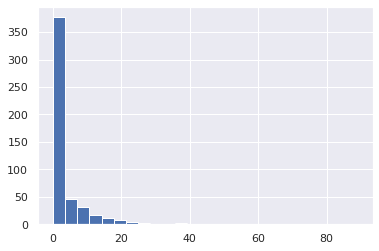

In [ ]:
df.CRIM.hist(bins=25)

In [ ]:
df.CRIM.skew()

5.223148798243851

In [ ]:
df.CRIM.median()

0.25651

In [ ]:
df.RM.skew()

0.40361213328874385

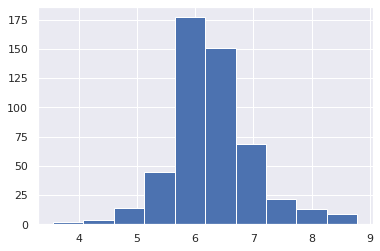

In [ ]:
df.RM.hist()

In [ ]:
# Check skewness - 
# For an ideal column - 
# 1. mean == median (50% percentile)
# 2. distnce of mean from min & max should be almost equal
# 3. std should be less than mean!!! 

In [14]:
df.sample(5)

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
211  0.37578   0.0  10.59   1.0  0.489  ...  277.0     18.6  395.24  23.98   19.3
40   0.03359  75.0   2.95   0.0  0.428  ...  252.0     18.3  395.62   1.98   34.9
454  9.51363   0.0  18.10   0.0  0.713  ...  666.0     20.2    6.68  18.71   14.9
318  0.40202   0.0   9.90   0.0  0.544  ...  304.0     18.4  395.21  10.36   23.1
335  0.03961   0.0   5.19   0.0  0.515  ...  224.0     20.2  396.90   8.01   21.1

[5 rows x 14 columns]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# generally we divide the data - 
# 1. 80% training 
# 2. 20% testing 

In [21]:
train_df, test_df = train_test_split(df, test_size=0.1) #10% test size

In [22]:
# (x_train, x_test), (y_train, y_test) = train_test_split(df.drop(columns=[PRICE]), 
                                                          # df.PRICE, 
                                                          # test_size = 0.1)

In [23]:
df.shape

(506, 14)

In [24]:
train_df.shape, test_df.shape

((455, 14), (51, 14))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression() 

In [28]:
train_df.sample(5)

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
497   0.26838   0.0   9.69   0.0  0.585  ...  391.0     19.2  396.90  14.10   18.3
437  15.17720   0.0  18.10   0.0  0.740  ...  666.0     20.2    9.32  26.45    8.7
500   0.22438   0.0   9.69   0.0  0.585  ...  391.0     19.2  396.90  14.33   16.8
58    0.15445  25.0   5.13   0.0  0.453  ...  284.0     19.7  390.68   6.86   23.3
27    0.95577   0.0   8.14   0.0  0.538  ...  307.0     21.0  306.38  17.28   14.8

[5 rows x 14 columns]

In [29]:
# INPUT - input to the model, all the independent variable (X)
# OUTPUT - model will predict this value in prediction phase (y)

lr.fit(X = train_df.drop(columns=["PRICE"]) ,
       y = train_df.PRICE)             # fit == train in sklearn ecosystem

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
train_df.drop(columns=["PRICE"])

CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
303   0.10000  34.0   6.09   0.0  0.433  ...   7.0  329.0     16.1  390.43   4.86
231   0.46296   0.0   6.20   0.0  0.504  ...   8.0  307.0     17.4  376.14   5.25
195   0.01381  80.0   0.46   0.0  0.422  ...   4.0  255.0     14.4  394.23   2.97
426  12.24720   0.0  18.10   0.0  0.584  ...  24.0  666.0     20.2   24.65  15.69
9     0.17004  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.71  17.10
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
8     0.21124  12.5   7.87   0.0  0.524  ...   5.0  311.0     15.2  386.63  29.93
46    0.18836   0.0   6.91   0.0  0.448  ...   3.0  233.0     17.9  396.90  14.15
53    0.04981  21.0   5.64   0.0  0.439  ...   4.0  243.0     16.8  396.90   8.43
69    0.12816  12.5   6.07   0.0  0.409  ...   4.0  345.0     18.9  396.90   8.79
467   4.42228   0.0  18.10   0.0  0.584  ...  24.0  666.0     20.2  331.29  21.32

[455 rows x 13 columns]

In [31]:
lr.coef_ # slop

array([-1.09217356e-01,  5.26722120e-02,  3.14044257e-02,  2.87352583e+00,
       -1.73845419e+01,  3.58595874e+00,  1.12540745e-03, -1.49413847e+00,
        3.20696378e-01, -1.33393253e-02, -9.51102821e-01,  9.33460444e-03,
       -5.33062185e-01])

In [32]:
lr.intercept_ # constant

37.87677632499827

In [33]:
train_df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [34]:
# for coef, col in zip(lr.coef_, train_df.columns[:-1]):
#   print(f"{round(coef, 3)}*{col} + ")

In [ ]:
# house_price = -0.112*CRIM + 0.046*ZN + 0.036*INDUS + 2.528*CHAS + -18.068*NOX + 
# 3.896*RM + 0.005*AGE + -1.451*DIS + 0.333*RAD + -0.013*TAX + -0.985*PTRATIO + 0.009*B + -0.542*LSTAT + 36.86

In [36]:
# Evaluation of line 
test_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
142  3.32105   0.0  19.58   1.0  0.871  ...  403.0     14.7  396.90  26.82   13.4
307  0.04932  33.0   2.18   0.0  0.472  ...  222.0     18.4  396.90   7.53   28.2
493  0.17331   0.0   9.69   0.0  0.585  ...  391.0     19.2  396.90  12.01   21.8
24   0.75026   0.0   8.14   0.0  0.538  ...  307.0     21.0  394.33  16.30   15.6
17   0.78420   0.0   8.14   0.0  0.538  ...  307.0     21.0  386.75  14.67   17.5

[5 rows x 14 columns]

In [37]:
lr.predict([[3.2, 0, 19.58, 1.0, 0.871, 5.4, 100, 1.32, 5.0, 403, 14.7, 396, 26.8]]) # predict one line 

array([15.03518356])

In [40]:
# model based on the learning have predicted house price
y_pred = lr.predict(test_df.drop(columns=["PRICE"]))
y_pred # predicted value 

array([15.02806995, 32.83068243, 20.70960426, 15.67954658, 16.90841245,
       22.12500849, 22.533513  , 13.23261996, 40.35134037, 17.31414323,
       25.16270405, 17.73083452, 22.60794905, 22.80171715, 32.20618186,
        9.97659074,  6.7067566 , 20.75641368, 25.18224415, 25.14093883,
       26.06440647, 34.42687721, 11.82800439, 24.95153524, 25.29664806,
       25.21768372, 21.98118032, 25.48453787, 28.39954744, 27.79210255,
       22.26904182, 22.81768173, 34.67157396, 18.65546324, 33.92554572,
       27.40820553, 32.70231513, 11.93285022, 22.40882254, 27.25799446,
       26.08816065, 15.32586912, 23.68686795, 21.08817596, 25.19336509,
       24.67894203, 23.85726587, 38.59335761, 37.71833399, 15.79013734,
       18.0827811 ])

In [43]:
y_actual = test_df["PRICE"]

In [45]:
y_actual.values #ground truth 

array([13.4, 28.2, 21.8, 15.6, 17.5, 22.5, 22.7, 12.8, 46. , 20. , 28.7,
       14.9, 21.7, 20.3, 27.9,  8.3, 10.2, 15.3, 25.3, 22.9, 20.7, 39.8,
       15.2, 21.6, 24. , 21.5, 20.9, 25. , 33.4, 23.9, 22. , 21.4, 37.3,
       19.6, 32. , 22.3, 30.3, 11.8, 20. , 23.2, 24.8, 16.2, 24.4, 22. ,
       28.1, 23.9, 21.4, 45.4, 44. , 13.1, 12.7])

In [48]:
# 1. Distance between truth & predicted value
(y_pred - y_actual).mean()

0.4447165821632546

In [50]:
# 2. Absolute Error
abs(y_pred - y_actual).mean()

2.5434945210946185

In [58]:
# 3. Squared Errors ..
(((y_pred - y_actual)**2).mean())**0.5

3.152963821319062

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
mean_absolute_error(y_actual, y_pred)

2.543494521094618

In [55]:
mean_squared_error(y_actual, y_pred)

9.941180858546906

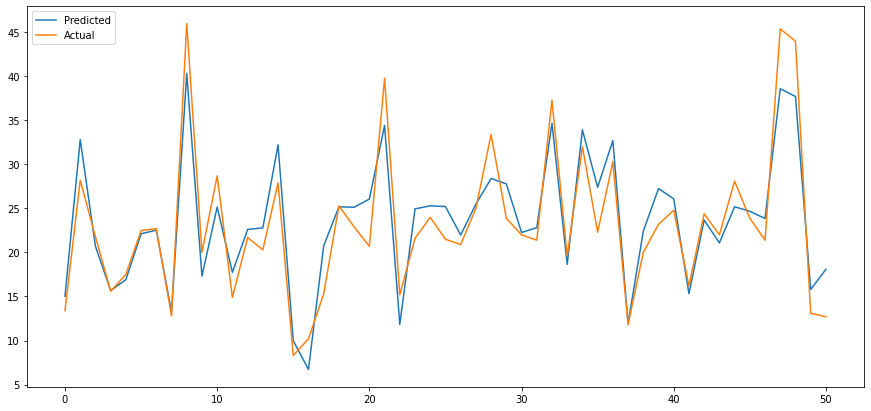

In [71]:
plt.figure(figsize=(15, 7))
plt.plot(y_pred, label="Predicted")
plt.plot(y_actual.values, label="Actual")
plt.legend()

In [72]:
# predict
lr.predict([[3.2, 0, 19.58, 1.0, 0.871, 5.4, 100, 1.32, 5.0, 403, 14.7, 396, 26.8]]) # predict one line 

array([15.03518356])

In [74]:
# Save the model 
import pickle as pkl
pkl.dump(lr, open("LR_Model_v1.pkl", "wb"))

In [75]:
# pkl.dump(lr, open("C:\\username\\Documents\\LR_Model_v1.pkl", "wb"))

In [76]:
# Load the model back! 
import pickle as pkl

In [77]:
house_price_mdoel = pkl.load(open("LR_Model_v1.pkl", "rb"))

In [78]:
type(house_price_mdoel)

sklearn.linear_model._base.LinearRegression

In [79]:
house_price_mdoel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
house_price_mdoel.coef_

array([-1.09217356e-01,  5.26722120e-02,  3.14044257e-02,  2.87352583e+00,
       -1.73845419e+01,  3.58595874e+00,  1.12540745e-03, -1.49413847e+00,
        3.20696378e-01, -1.33393253e-02, -9.51102821e-01,  9.33460444e-03,
       -5.33062185e-01])